In [6]:
library(ggplot2)
set.seed(92)
df1 <- data.frame(value = c(), mean = c())
confidence_interval <- function(vector, confidence_level) {
  a <- qnorm(1 - ((1 - confidence_level) / 2))
  erro <- a / sqrt(length(vector))
  result <- c((1 - erro) / mean(vector), (1 + erro) / mean(vector))
  return(result)
}
for (num in seq(100, 2500, 100)) {
    all_values <- c()
    all_values_c <- c()
    for (i in 1:1400) {
        observations <- rexp(num, 1.16)
        outliers <- rexp(num * 0.15, 0.02)
        observations_c <- c(outliers, observations[(num * 0.15):length(observations)])
        interval <- confidence_interval(observations, 0.98)
        interval_c <- confidence_interval(observations_c, 0.98)
        all_values <- c(all_values, abs(interval[1] - interval[2]))
        all_values_c <- c(all_values_c, abs(interval_c[1] - interval_c[2]))
    }
    mean <- mean(all_values)
    mean_c <- mean(all_values_c)
    df1 <- rbind(df1, data.frame(value = num, mean = mean, mean_c = mean_c))
}

Saving 6.67 x 6.67 in image



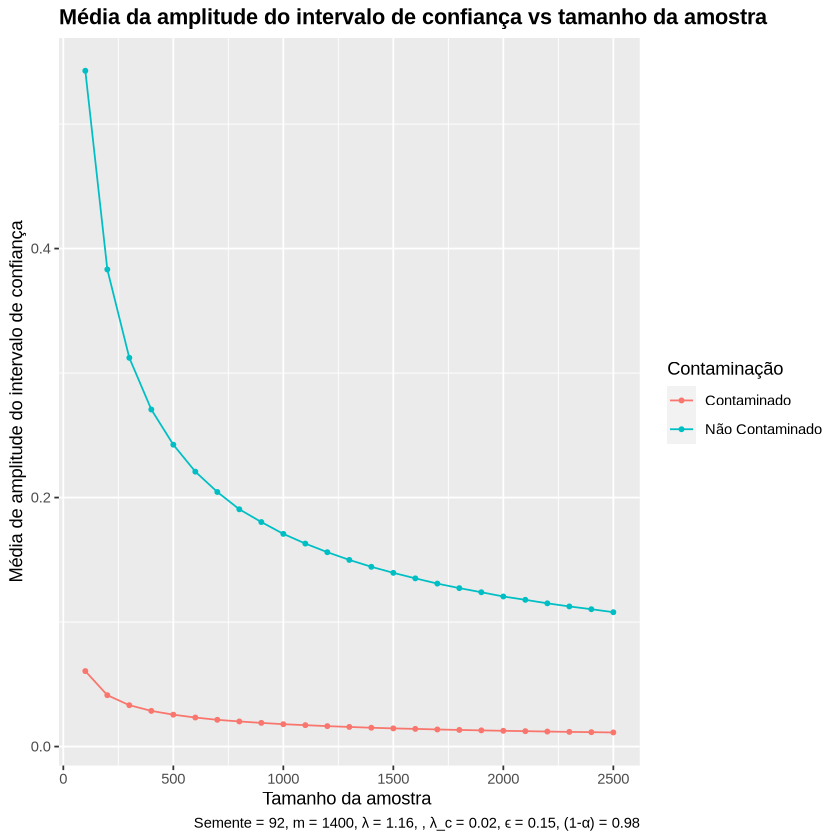

In [7]:
library("tidyr")
names(df1)[2] <- "Não Contaminado"
names(df1)[3] <- "Contaminado"
df1_tidy <- df1 %>%
  pivot_longer(c("Não Contaminado", "Contaminado"), names_to = "Contaminação", values_to = "Intervalo")
df1_plot <- ggplot(df1_tidy, aes(x = value, y = Intervalo, color = Contaminação)) +
    labs(x = "Tamanho da amostra ", y = "Média de amplitude do intervalo de confiança", title = "Média da amplitude do intervalo de confiança vs tamanho da amostra",
    caption = "Semente = 92, m = 1400, λ = 1.16, , λ_c = 0.02, ϵ = 0.15, (1-α) = 0.98") +
    theme(plot.title = element_text(size = 13, face = "bold")) +
    geom_line() +
    geom_point(size = 1)
ggsave("amplitudevssample.png", df1_plot)
df1_plot